In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from time import sleep
from scipy.stats import linregress
from pprint import pprint
import csv

In [2]:
# Study data files
physical_activity_path = "../../data/Physical_activity.csv"
suicide_path = "../../data/Suicide.csv"

In [3]:
# Read the data and store into Pandas DataFrame
physical_activity = pd.read_csv(physical_activity_path)

# Display the data table for preview
physical_activity.head()

,Year,LocationAbbr,Location,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,US,National,Percent of adults who engage in no leisure-tim...,30.6,29.4,31.8,31255.0,NaN,NaN,Hispanic
1,2015,US,National,Percent of adults who achieve at least 300 min...,26.6,25.6,27.6,30904.0,NaN,NaN,NaN
2,2015,GU,Guam,Percent of adults who achieve at least 150 min...,27.4,18.6,38.5,125.0,NaN,NaN,Hispanic
3,2015,PR,Puerto Rico,Percent of adults who engage in no leisure-tim...,38.1,32.6,43.8,421.0,NaN,NaN,NaN
4,2015,GU,Guam,Percent of adults who engage in no leisure-tim...,30.5,25.8,35.6,559.0,NaN,NaN,NaN


In [4]:
# Read the data
suicide = pd.read_csv(suicide_path)

# Display the data table for preview
suicide.head()

,YEAR,STATE,RATE,DEATHS
0,2020,AL,16.0,793
1,2020,AK,27.5,204
2,2020,AZ,17.6,1363
3,2020,AR,19.0,583
4,2020,CA,10.0,4144


In [5]:
physical_activity = physical_activity.rename(columns={'YearEnd':'Year', 'LocationAbbr':'State'})

In [6]:
suicide = suicide.rename(columns={'YEAR':'Year', 'STATE':'State', 'RATE':'Suicide Rate'})

In [7]:
suicide_activity_df = pd.merge(suicide, physical_activity, on=["Year","State"], how="outer")
suicide
suicide_activity_df.head()

,Year,State,Suicide Rate,DEATHS,Location,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.6,31.4,38.1,1346.0,NaN,NaN,Non-Hispanic Black
1,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,22.5,18.6,26.9,576.0,25 - 34,NaN,NaN
2,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,45.9,40.0,51.8,487.0,NaN,NaN,NaN
3,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,24.2,14.1,38.5,79.0,NaN,NaN,2 or more races
4,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.7,31.7,37.7,1528.0,NaN,NaN,NaN


In [8]:
suicide_activity_2020_df = suicide_activity_df.loc[suicide_activity_df['Year'] == 2020]
suicide_activity_2020_df.head()

,Year,State,Suicide Rate,DEATHS,Location,Question,Data_Value,Low_Confidence,High_Confidence,Sample_Size,Age(years),Gender,Race/Ethnicity
0,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.6,31.4,38.1,1346.0,NaN,NaN,Non-Hispanic Black
1,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,22.5,18.6,26.9,576.0,25 - 34,NaN,NaN
2,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,45.9,40.0,51.8,487.0,NaN,NaN,NaN
3,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,24.2,14.1,38.5,79.0,NaN,NaN,2 or more races
4,2020,AL,16.0,793,Alabama,Percent of adults who engage in no leisure-tim...,34.7,31.7,37.7,1528.0,NaN,NaN,NaN


In [9]:
# suicide_activity_2020_DE_df = suicide_activity_2020_DE_df.loc[suicide_activity_2020_DE_df['Question'] == "Percent of adults who engage in no leisure-time physical activity"]
# suicide_activity_2020_DE_df.head()

In [10]:
Value_by_gender = suicide_activity_2020_df[["Data_Value","Sample_Size","Gender","State"]]
Value_by_gender.head()

,Data_Value,Sample_Size,Gender,State
0,34.6,1346.0,NaN,AL
1,22.5,576.0,NaN,AL
2,45.9,487.0,NaN,AL
3,24.2,79.0,NaN,AL
4,34.7,1528.0,NaN,AL


In [11]:
Value_by_gender = Value_by_gender.dropna().set_index("State")
Value_by_gender

,Data_Value,Sample_Size,Gender
State,,,
AL,25.2,2171.0,Male
AL,32.1,3165.0,Female
AK,24.7,1851.0,Female
AK,18.2,1810.0,Male
AZ,20.4,4755.0,Male
...,...,...,...
PR,39.8,1978.0,Male
GU,21.6,1017.0,Male
GU,30.2,1165.0,Female


In [12]:
Value_by_gender["no_physical_activity"] = Value_by_gender["Data_Value"] * Value_by_gender["Sample_Size"] / 100
Value_by_gender.head()

,Data_Value,Sample_Size,Gender,no_physical_activity
State,,,,
AL,25.2,2171.0,Male,547.092
AL,32.1,3165.0,Female,1015.965
AK,24.7,1851.0,Female,457.197
AK,18.2,1810.0,Male,329.420
AZ,20.4,4755.0,Male,970.020


In [13]:
total_people = Value_by_gender.groupby("State")["Sample_Size","no_physical_activity"].sum()
total_people.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_26584\720918558.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_people = Value_by_gender.groupby("State")["Sample_Size","no_physical_activity"].sum()


,Sample_Size,no_physical_activity
State,,
AK,3661.0,786.617
AL,5336.0,1563.057
AR,5231.0,1586.524
AZ,10276.0,2311.623
CA,4797.0,1017.825


In [14]:
avg_physical_activity = total_people["no_physical_activity"] / total_people["Sample_Size"] * 100

total_people["avg_physical_activity"] = avg_physical_activity

total_people.head()



,Sample_Size,no_physical_activity,avg_physical_activity
State,,,
AK,3661.0,786.617,21.486397
AL,5336.0,1563.057,29.292672
AR,5231.0,1586.524,30.329268
AZ,10276.0,2311.623,22.495358
CA,4797.0,1017.825,21.217949


In [15]:
suicide_2020 = suicide.loc[suicide['Year'] == 2020]
suicide_2020
merged_suicide_activity_2020_df = pd.merge(suicide_2020, total_people, on=["State"], how="outer")
#merged_suicide_activity_2020_df["Year"] =merged_suicide_activity_2020_df["Year"].map("{:,}".format)

merged_suicide_activity_2020_df.head()


,Year,State,Suicide Rate,DEATHS,Sample_Size,no_physical_activity,avg_physical_activity
0,2020.0,AL,16.0,793,5336.0,1563.057,29.292672
1,2020.0,AK,27.5,204,3661.0,786.617,21.486397
2,2020.0,AZ,17.6,1363,10276.0,2311.623,22.495358
3,2020.0,AR,19.0,583,5231.0,1586.524,30.329268
4,2020.0,CA,10.0,4144,4797.0,1017.825,21.217949


In [29]:
# # Read the suicide data
# suicide_path = "Data/Suicide.csv"
# suicide = pd.read_csv(suicide_path)

# # Filter the data for years 2019, 2020, and 2021
# years = [2018, 2019, 2020]
# suicide_years = suicide[suicide['YEAR'].isin(years)]

# # Group the data by year and state, and calculate the mean rate
# grouped = suicide_years.groupby(['YEAR', 'STATE']).mean().reset_index()

# Create a line graph with three lines for each year
# State = merged_suicide_activity_2020_df["State"]
# plt.figure(figsize=(30,20))

# # for state in State:
# #     data = grouped[grouped['YEAR'] == year]
# #     plt.plot(data['STATE'], data['RATE'], label=str(year))

# # plt.xlabel('State')
# # plt.ylabel('Suicide Rate')
# # plt.title('Suicide Rate by State (2018-2020)')

# # Generate a line plot
# # merged_suicide_activity_2020_df= merged_suicide_activity_2020_df[["Suicide Rate", "avg_physical_activity"]]
# # Line graph
# # merged_suicide_activity_2020_df.plot(kind='line', legend=None)
# plt.plot(merged_suicide_activity_2020_df['Suicide Rate'], merged_suicide_activity_2020_df['avg_physical_activity'], label=str(state))
# # plt.xlabel("State")
# # plt.xticks("State")
# plt.title("Suicide Rate vs No Activity by State")
# plt.ylabel("Percentage")
# plt.legend()
# plt.show()

ValueError: Unrecognized character S in format string

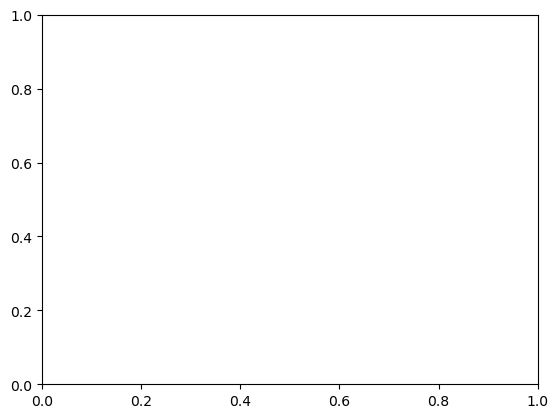

In [33]:
# Plot the charts and apply some styling
suicide_rate = plt.plot("State", "Suicide Rate", color="red", label="Suicide Rate")
no_activity_rate = plt.plot("State", float("avg_physical_activity"), color="blue", label="No Exercise Rate")

# Add labels to X and Y axes :: Add title
plt.title("Coaster Speed Over Time")
plt.xlabel("Coaster Runtime")
plt.ylabel("Speed (MPH)")

# Set the limits for the X and Y axes
plt.xlim(0,60)
plt.ylim(0,60)


# Create a legend for the chart
plt.legend(handles=[suicide_rate, no_activity_rate], loc="best")

# Add in a grid for the chart
#plt.grid()

plt.show()


In [ ]:
#df['Result'] = df['Column A']/df['Column B']
avg_gender = (Value_by_gender["Data_Value"]*Value_by_gender["Sample_Size"])
total_sample = Value_by_gender["Sample_Size"].sum()
avg_value = avg_gender.sum()/total_sample.sum()
avg_value




23.32939910413123

In [ ]:
suicide_activity_2020_DE_df["Avg_Value"] = Avg_value
suicide_activity_2020_DE_df.head()

,Year,State,Suicide Rate,DEATHS,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Gender,Race/Ethnicity,StratificationCategory1,Avg_Value
588,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,15.3,6.9,30.6,65.0,NaN,NaN,Asian,Race/Ethnicity,24.6
590,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,17.5,11.7,25.2,276.0,18 - 24,NaN,NaN,Age (years),24.6
596,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,25.0,21.1,29.3,799.0,NaN,NaN,NaN,Income,24.6
601,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,33.2,25.9,41.4,335.0,NaN,NaN,NaN,Income,24.6
603,2020,DE,12.3,124,Delaware,Percent of adults who engage in no leisure-tim...,21.5,19.5,23.7,2625.0,NaN,NaN,Non-Hispanic White,Race/Ethnicity,24.6


Text(0, 0.5, 'Rate')

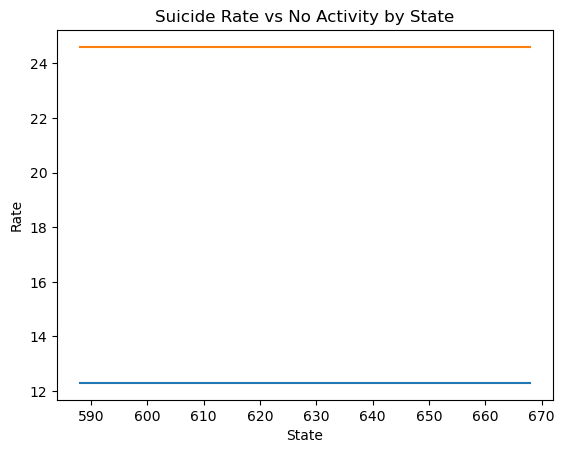

In [ ]:
# Generate a line plot
suicide_activity_2020_DE_df = suicide_activity_2020_DE_df[["Suicide Rate", "Avg_Value"]]

# Line graph
suicide_activity_2020_DE_df.plot(kind='line', legend=None)
plt.xlabel("State")
plt.title("Suicide Rate vs No Activity by State")
plt.ylabel("Rate")

# # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# drug_count_s = clean_data_complete_df["Drug Regimen"].value_counts()
# bar_timepoint = drug_count_s.plot.bar(legend=None)
# bar_timepoint
# plt.xlabel("State")
# plt.ylabel("Rate")